# AGDC Version 2 Requirements till 30 June 2016 10/12/2015

## Summary

A great deal of work has been done by AGDC partners to outline the key requirements and technical approach for the next version of the AGDC (Version 2). For example, the previous Technical Working Group held a workshop that resulted in a draft Preliminary Design Report that has subsequently been translated to the AGDC wiki ( http://datacube.org.au ). Similarly, prototype functionality has been built to test and verify key concepts for a range of components including the netCDF-4 based Storage Units that are managed under NCIfs NERDIP data management, publishing and general access to data protocols; a Generalised Data Framework (GDF) to access the multidimensional Storage Units; and the AGDC Analytic Engine adding support for interactive Exploratory Data Analysis (EDA).

The following requirements for Version 2 have been mainly based off this thinking and documentation. It is important to note that these requirements are for the current development
effort running through till June 30, 2016. They are designed to guide and define the next step in the development of the AGDC, not as the final destination.


Approved Requirements for AGDC Version 2

These requirements were formally approved by the AGDC Programme Board at its meeting on 10
December, 2015.

# Patterns of Use:
AGDC Version 2 will support the following patterns of use.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import datacube
from datacube.model import Range
from datetime import datetime
dc = datacube.Datacube(app='dc-example')
from datacube.utils import geometry
from datacube.storage import masking
from datacube.storage.masking import mask_invalid_data
import pandas
import xarray
import numpy

In [2]:
import folium
from IPython.display import display
import geopandas
from shapely.geometry import mapping
from shapely.geometry import MultiPolygon
import rasterio
import shapely.geometry
import shapely.ops
from functools import partial
import pyproj
#from datacube.model import datacube.utils.geometry.CRS
import time
from dateutil import tz

In [3]:
datacube.__version__

'1.5.1'

# Remote Datacube


In [4]:
from datacube import Datacube
remotedc = Datacube(config='/home/547/jps547/.aws_datacube.conf')

In [5]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Launceston, Tasmania")

In [6]:
location

Location(Launceston, Tasmania, 7250, Australia, (-41.4340813, 147.1373496, 0.0))

In [7]:
query = {
    'lat': (-41.82, -41.81),
    'lon': (146.71, 146.72),
}

wofs = remotedc.load(product='wofs_modified_albers', group_by='solar_day', **query)

wofs.water.flags_definition
pandas.DataFrame.from_dict(masking.get_flags_def(wofs), orient='index')

bits                                  values  \
result  [0, 1, 2, 3, 4, 5, 6, 7]  {'0': 'clear_dry', '128': 'clear_wet'}   

                                              description  
result  Classification result with unclear observation...

In [8]:
wofs

<xarray.Dataset>
Dimensions:  (time: 1293, x: 40, y: 48)
Coordinates:
  * time     (time) datetime64[ns] 1986-08-21T23:19:52 1987-05-29T23:16:29 ...
  * y        (y) float64 -4.643e+06 -4.643e+06 -4.643e+06 -4.643e+06 ...
  * x        (x) float64 1.25e+06 1.25e+06 1.25e+06 1.25e+06 1.25e+06 ...
Data variables:
    water    (time, y, x) uint8 136 136 136 136 136 136 136 136 136 136 136 ...
Attributes:
    crs:      EPSG:3577

In [9]:
wofs.water.plot(col='time', col_wrap=5, robust=True)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [10]:
remotedc.list_products()

name  \
id                                 
36            bom_rainfall_grids   
32                      dsm1sv10   
53                     gamma_ray   
42                 ls5_fc_albers   
2               ls5_level1_scene   
6                ls5_nbar_albers   
3                 ls5_nbar_scene   
26              ls5_nbart_albers   
4                ls5_nbart_scene   
41               ls5_ndvi_albers   
23                 ls5_pq_albers   
5                   ls5_pq_scene   
1   ls5_satellite_telemetry_data   
66            ls5_wofs_pq_albers   
62             ls5_wofs_pq_scene   
44                 ls7_fc_albers   
9               ls7_level1_scene   
21               ls7_nbar_albers   
10                ls7_nbar_scene   
29              ls7_nbart_albers   
11               ls7_nbart_scene   
45               ls7_ndvi_albers   
22                 ls7_pq_albers   
12                  ls7_pq_scene   
8   ls7_satellite_telemetry_data   
67            ls7_wofs_pq_albers   
63             ls7_wofs_pq_scene   
47                 ls8_fc_albers   
40          ls8_level1_oli_scene   
14              ls8_level1_scene   
19               ls8_nbar_albers   
60           ls8_nbar_oli_albers   
57            ls8_nbar_oli_scene   
15                ls8_nbar_scene   
28              ls8_nbart_albers   
61          ls8_nbart_oli_albers   
58           ls8_nbart_oli_scene   
16               ls8_nbart_scene   
55               ls8_ndvi_albers   
20                 ls8_pq_albers   
59              ls8_pq_oli_scene   
17                  ls8_pq_scene   
13  ls8_satellite_telemetry_data   
68            ls8_wofs_pq_albers   
65         ls8_wofs_pq_oli_scene   
64             ls8_wofs_pq_scene   
49            modis_mcd43a1_tile   
50            modis_mcd43a2_tile   
51            modis_mcd43a3_tile   
52            modis_mcd43a4_tile   
70               s1_gamma0_scene   
56                srtm_dem1sv1_0   
46                   wofs_albers   
69          wofs_modified_albers   
71         wofs_modified_albers2   

                                          description  gqa_iterative_mean_xy  \
id                                                                             
36  Interpolated Rain Gauge Precipitation 1-Day Au...                    NaN   
32                               DSM 1sec Version 1.0                    NaN   
53  The 2015 radiometric or gamma-ray grid of Aust...                    NaN   
42  Landsat 5 Fractional Cover 25 metre, 100km til...                    NaN   
2       Landsat 5 Level 1 At-sensor Radiance 25 metre                    NaN   
6   Landsat 5 Surface Reflectance NBAR 25 metre, 1...                    NaN   
3                             Landsat 5 NBAR 25 metre                    NaN   
26  Landsat 5 Surface Reflectance NBART 25 metre, ...                    NaN   
4                            Landsat 5 NBART 25 metre                    NaN   
41  Landsat 5 Normalised Difference Vegetation Ind...                    NaN   
23  Landsat 5 Pixel Quality 25 metre, 100km tile, ...                    NaN   
5                               Landsat 5 PQ 25 metre                    NaN   
1                  Landsat 5 Satellite Telemetry Data                    NaN   
66  Landsat 5 WoFS Pixel Quality 25 metre, 100km t...                    NaN   
62                         Landsat 5 WoFS PQ 25 metre                    NaN   
44  Landsat 7 Fractional Cover 25 metre, 100km til...                    NaN   
9       Landsat 7 Level 1 At-sensor Radiance 25 metre                    NaN   
21  Landsat 7 Surface Reflectance NBAR 25 metre, 1...                    NaN   
10                            Landsat 7 NBAR 25 metre                    NaN   
29  Landsat 7 Surface Reflectance NBART 25 metre, ...                    NaN   
11                           Landsat 7 NBART 25 metre                    NaN   
45  Landsat 7 Normalised Difference Vegetation Ind...                    NaN   
22  Landsat 7 Pixel Quality 25 metre, 100km tile, ...  

In [11]:
water = masking.make_mask(wofs, result='clear_wet')

water.water.plot(col='time', col_wrap=5, robust=True, cmap='gray')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


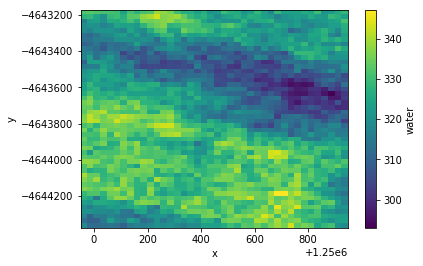

In [12]:
water.water.sum('time').plot()

In [13]:
results = remotedc.index.datasets.search_eager(product='wofs_modified_albers')

In [14]:
len(results)

27374

In [15]:
results[0].metadata_doc

{'creation_dt': '2017-05-25T06:56:11.659905',
 'extent': {'center_dt': '1989-05-25T23:26:50.500000',
  'coord': {'ll': {'lat': -41.556383339144354, 'lon': 144.9930938520391},
   'lr': {'lat': -41.46629954169359, 'lon': 146.06969953656235},
   'ul': {'lat': -40.829603078499936, 'lon': 144.8993384246449},
   'ur': {'lat': -40.740496621630555, 'lon': 145.96829536025385}},
  'from_dt': '1989-05-25T23:26:50.500000',
  'to_dt': '1989-05-25T23:26:50.500000'},
 'format': {'name': 'NetCDF'},
 'grid_spatial': {'projection': {'geo_ref_points': {'ll': {'x': 1100000.0,
     'y': -4600000.0},
    'lr': {'x': 1200000.0, 'y': -4600000.0},
    'ul': {'x': 1100000.0, 'y': -4500000.0},
    'ur': {'x': 1200000.0, 'y': -4500000.0}},
   'spatial_reference': 'EPSG:3577',
   'valid_data': {'coordinates': [[[1200000.0, -4600000.0],
      [1107513.9722147747, -4600000.0],
      [1120392.8471342174, -4566493.70205246],
      [1137275.871406351, -4522571.978795248],
      [1138022.370226538, -4520711.963255638],


In [16]:
results = None
water = None
wofs = None

 # Test for native projection query on non standard rainfall product

In [17]:
query = {
    'product': 'bom_rainfall_grids',
    'crs': 'EPSG:3577',
    'time': ('1987-10-01', '1990-10-01'),
    'x': (349388.9787330463, 358497.9246628304),
    'y': (-2379960.5883129314, -2375926.544118764),
    'output_crs': 'EPSG:3577', 
    'resolution': (-25, 25),
    'resampling': 'cubic',
}

rainfall_projected = dc.load(**query)
rainfall_projected

<xarray.Dataset>
Dimensions:   (time: 1096, x: 365, y: 162)
Coordinates:
  * time      (time) datetime64[ns] 1987-10-01 1987-10-02 1987-10-03 ...
  * y         (y) float64 -2.376e+06 -2.376e+06 -2.376e+06 -2.376e+06 ...
  * x         (x) float64 3.494e+05 3.494e+05 3.494e+05 3.495e+05 3.495e+05 ...
Data variables:
    rainfall  (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
Attributes:
    crs:      EPSG:3577

In [18]:
rainfall_projected = None

# Search for dataset by location example

In [19]:
# Was replaced by stacked file
# ds_uri = 'file:///g/data/rs0/datacube/002/LS5_TM_NBART/-7_-30/LS5_TM_NBART_3577_-7_-30_20030711011529000000_v1488078639.nc'

ds_uri = 'file:///g/data/rs0/datacube/002/LS5_TM_NBAR/13_-35/LS5_TM_NBAR_3577_13_-35_2009_v1496827052.nc'
datasets_in_stack = list(dc.index.datasets.get_datasets_for_location(uri=ds_uri))

# If restacked, there will be a newer file (with higher vXXX version suffix)
# So this one shouldn't change:
assert len(datasets_in_stack) == 74
assert set(d.type.name for d in datasets_in_stack) == {'ls5_nbar_albers'}
print(repr(datasets_in_stack[0]))

datasets_in_stack = None

Dataset <id=00adc495-be06-4235-bee3-9de40d38a8db type=ls5_nbar_albers location=/g/data/rs0/datacube/002/LS5_TM_NBAR/13_-35/LS5_TM_NBAR_3577_13_-35_2009_v1496827052.nc>


In [20]:
!module list

Currently Loaded Modulefiles:
  1) pbs                     3) agdc-py3/1.5.1
  2) agdc-py3-env/20170713   4) agdc-py3-prod/1.5.1


In [21]:
!datacube system check

Version:	1.5.1
Config files:	/g/data/v10/public/modules/agdc-py3-prod/1.5.1/datacube.conf
Host:		130.56.244.105:6432
Database:	datacube
User:		jmh547

Valid connection:	YES
You have ADMIN privileges.


In [22]:
def chop_to_globe(geom):
    to_crs = geometry.CRS("EPSG:4326")
    left_of_dt = geometry.line(
        [
            (180 - 1.0e-8, -90), 
            (180 - 1.0e-8, 90)
        ], 
        crs=to_crs
    ).to_crs(geom.crs)
    
    right_of_dt = geometry.line(
        [
            (-180 + 1.0e-8, 90), 
            (-180 + 1.0e-8, -90)
        ], 
        crs=to_crs
    ).to_crs(geom.crs)

    chopper = geometry.polygon(
        left_of_dt.points + right_of_dt.points + [left_of_dt.points[0]], 
        crs=geom.crs
    )
    return geom.intersection(chopper)

def datasets_union_clip180(dss):
    thing = geometry.unary_union(ds.extent for ds in dss)
    return chop_to_globe(thing).to_crs(geometry.CRS('EPSG:4326'))

In [23]:
def datasets_union(dss):
    thing = geometry.unary_union(ds.extent for ds in dss)
    print(thing.crs)
    return thing.to_crs(geometry.CRS('EPSG:4326'))

In [24]:
import random
def plot_folium(shapes):

    mapa = folium.Map(location=[-30,150], zoom_start=4)
    colors=['#00ff00', '#ff0000', '#00ffff', '#ffffff', '#000000', '#ff00ff']
    for shape in shapes:
        style_function = lambda x: {'fillColor': '#000000' if x['type'] == 'Polygon' else '#00ff00', 
                                    'color' : random.choice(colors)}
        poly = folium.features.GeoJson(mapping(shape), style_function=style_function)
        mapa.add_child(poly)
    display(mapa)

In [25]:
def plot_rgb(image, fake_saturation):
    image = mask_invalid_data(image)
    rgb = image.to_array(dim='color')
    rgb = rgb.transpose(*(rgb.dims[1:] + rgb.dims[:1]))  # make 'color' the last dimension
    rgb = rgb.where((rgb <= fake_saturation).all(dim='color'))  # mask out pixels where any band is 'saturated'
    rgb /= fake_saturation  # scale to [0, 1] range for imshow

    rgb.plot.imshow(
        x=image.crs.dimensions[1], 
        y=image.crs.dimensions[0],
        col='time', 
        col_wrap=5, 
        add_colorbar=False
    )

In [26]:
datacube.__path__

['/g/data/v10/public/modules/agdc-py3/1.5.1/lib/python3.6/site-packages/datacube']

# Plot WOfS

In [27]:
plot_folium([
    datasets_union(
        remotedc.index.datasets.search_eager(product='ls7_wofs_pq_scene', )
    )
])

EPSG:28355


# GQA based search

In [28]:
# Get NBAR where source level1 matches a certain quality

source_filter = dict(product='ls8_level1_scene', gqa_cep90=(-0.25, 0.25))

query = datacube.api.query.Query(
    product='ls8_nbar_albers', 
    time=('2015-01-01', '2015-02-01'), 
    source_filter=source_filter
)
data = dc.index.datasets.search_eager(**query.search_terms)

In [29]:
data

[Dataset <id=00556b09-6e28-421d-8b38-33700433cd3a type=ls8_nbar_albers location=/g/data/rs0/datacube/002/LS8_OLI_NBAR/-9_-30/LS8_OLI_NBAR_3577_-9_-30_2015_v1496400956.nc>,
 Dataset <id=007375a7-71cd-42e7-bb5b-7a5b4f32086b type=ls8_nbar_albers location=/g/data/rs0/datacube/002/LS8_OLI_NBAR/-2_-32/LS8_OLI_NBAR_3577_-2_-32_2015_v1496400956.nc>,
 Dataset <id=0073e2fe-4370-48d8-8aed-3e5cfdcd1a27 type=ls8_nbar_albers location=/g/data/rs0/datacube/002/LS8_OLI_NBAR/7_-23/LS8_OLI_NBAR_3577_7_-23_2015_v1496400956.nc>,
 Dataset <id=008adc15-c201-44e6-9ede-6c13892bb855 type=ls8_nbar_albers location=/g/data/rs0/datacube/002/LS8_OLI_NBAR/14_-28/LS8_OLI_NBAR_3577_14_-28_2015_v1496400956.nc>,
 Dataset <id=0093d3de-3f09-43d2-8d6d-5df13618b7ff type=ls8_nbar_albers location=/g/data/rs0/datacube/002/LS8_OLI_NBAR/15_-32/LS8_OLI_NBAR_3577_15_-32_2015_v1496400956.nc>,
 Dataset <id=00975635-d438-4068-8086-b3c5f2df4f4b type=ls8_nbar_albers location=/g/data/rs0/datacube/002/LS8_OLI_NBAR/0_-19/LS8_OLI_NBAR_3577_

# Confirm Dashboard Works

In [30]:
# Dashboard view of current production status per product with Spatial, Tabular and Reference views
#!/g/data/v10/public/run-dash.sh
#!firefox http://127.0.0.1:8080/

# Search with sources

In [31]:
(
     dc.index.datasets.get('11228944-42f6-4b9f-a434-73e0c7f9bde2', include_sources=True)
).metadata_doc['lineage']['source_datasets']['0']['lineage']['source_datasets']['level1']['gqa']

{'colors': {'blue': 18.0,
  'green': 253.0,
  'red': 4.0,
  'teal': 55.0,
  'yellow': 7.0},
 'error_message': 'no errors',
 'final_gcp_count': 286,
 'ref_date': '2015-02-03',
 'ref_source': 'GQA_v3',
 'ref_source_path': '/g/data/v10/eoancillarydata/GCP/GQA_v3/wrs2/099/079/LC80990792015034LGN00_B6.TIF',
 'residual': {'abs': {'x': 0.19, 'xy': 0.43, 'y': 0.39},
  'abs_iterative_mean': {'x': 0.11, 'xy': 0.24, 'y': 0.22},
  'cep90': 0.53,
  'iterative_mean': {'x': 0.05, 'xy': 0.1, 'y': -0.09},
  'iterative_stddev': {'x': 0.13, 'xy': 0.3, 'y': 0.28},
  'mean': {'x': 0.06, 'xy': 0.14, 'y': -0.13},
  'stddev': {'x': 0.4, 'xy': 0.88, 'y': 0.79}}}

# Refine search using sources

In [32]:
from datacube.model import Range
results=[]
for product in ['ls5_level1_scene']:
    results.append(dc.index.datasets.search_eager(
        product=product,
        sat_path = Range(91,92),
        sat_row = Range(88,90),
    ))
print(len(results))
print(str(results[0][0].local_path))

1
/g/data/v10/reprocess/ls5/level1/2004/12/LS5_TM_OTH_P51_GALPGS01-002_091_089_20041228/ga-metadata.yaml


In [33]:
from datacube.model import Range
time_range = Range(datetime(2013, 10, 1), datetime(2014, 1, 1))
results = dc.index.datasets.search_eager(
    product='ls8_nbar_albers',
    time=time_range,
    source_filter=dict(
        product='ls8_level1_scene',
        sat_path = Range(87,116),
        sat_row = Range(67,91),
    )
)
print(len(results))
print(results[0])

19926
Dataset <id=00037981-a131-42b4-9d6c-818b170876d2 type=ls8_nbar_albers location=/g/data/rs0/datacube/002/LS8_OLI_NBAR/-16_-20/LS8_OLI_NBAR_3577_-16_-20_2013_v1496416918.nc>


In [34]:
results[0].metadata_doc

{'creation_dt': '2016-07-13T00:46:06.571574',
 'extent': {'center_dt': '2013-11-14T02:09:45.500000',
  'coord': {'ll': {'lat': -17.92211829467786, 'lon': 117.55633296123455},
   'lr': {'lat': -17.949776440040374, 'lon': 117.81303688442733},
   'ul': {'lat': -17.735014564282437, 'lon': 117.57847647232195},
   'ur': {'lat': -17.762644355615926, 'lon': 117.83479338134532}},
  'from_dt': '2013-11-14T02:09:45.500000',
  'to_dt': '2013-11-14T02:09:45.500000'},
 'format': {'name': 'NetCDF'},
 'grid_spatial': {'projection': {'geo_ref_points': {'ll': {'x': -1600000.0,
     'y': -2000000.0},
    'lr': {'x': -1500000.0, 'y': -2000000.0},
    'ul': {'x': -1600000.0, 'y': -1900000.0},
    'ur': {'x': -1500000.0, 'y': -1900000.0}},
   'spatial_reference': 'EPSG:3577',
   'valid_data': {'coordinates': [[[-1500000.0, -1981883.5883454375],
      [-1500000.0, -2000000.0],
      [-1527372.121915022, -2000000.0],
      [-1525286.0793115464, -1980466.070689878],
      [-1525151.3293377792, -1979242.1245786

In [35]:
results = None

# Grid Cell count of timeslices

In [36]:
product = 'ls8_nbar_albers'

gw = datacube.api.GridWorkflow(dc.index, product=product)
cells = gw.list_cells(product=product, time=('2016-01-01', '2017-01-01'))

for idx, data in cells.items():
    print(idx, data.shape[0])
    
cells = None

(-16, -38) 63
(-13, -31) 51
(-14, -29) 46
(-14, -38) 63
(-15, -28) 46
(-15, -29) 64
(-15, -25) 63
(-16, -34) 63
(-13, -24) 65
(-15, -23) 43
(-13, -26) 63
(-14, -30) 65
(-16, -35) 62
(-15, -34) 63
(-14, -31) 51
(-13, -29) 64
(-15, -33) 45
(-15, -30) 65
(-13, -23) 64
(-14, -32) 66
(-13, -27) 62
(-15, -31) 51
(-16, -39) 63
(-14, -28) 64
(-16, -37) 65
(-14, -34) 45
(-14, -23) 47
(-16, -33) 68
(-15, -32) 66
(-14, -39) 45
(-14, -37) 65
(-13, -25) 63
(-15, -27) 62
(-16, -36) 50
(-15, -37) 95
(-14, -25) 63
(-15, -36) 56
(-13, -32) 76
(-15, -24) 65
(-14, -33) 63
(-13, -30) 65
(-13, -28) 64
(-15, -38) 80
(-14, -35) 62
(-14, -24) 65
(-15, -39) 45
(-14, -36) 50
(-14, -27) 44
(-15, -35) 62
(-9, -39) 68
(10, -18) 52
(-11, -40) 63
(10, -12) 72
(12, -11) 35
(12, -12) 52
(9, -16) 72
(11, -14) 70
(10, -17) 70
(10, -10) 18
(-9, -41) 70
(-11, -41) 71
(9, -13) 72
(8, -16) 54
(10, -14) 53
(10, -16) 70
(11, -11) 35
(11, -13) 53
(11, -12) 70
(9, -20) 70
(11, -15) 52
(8, -15) 72
(9, -14) 72
(8, -17) 72
(10, -1

(24, -27) 17
(-18, -40) 36
(-5, -32) 70
(-6, -31) 70
(-6, -29) 71
(-5, -31) 70
(-6, -30) 71
(-5, -30) 54
(-4, -31) 70
(-17, -38) 36
(-17, -39) 36
(-17, -37) 36
(-18, -38) 12
(-18, -39) 34
(6, -40) 70
(7, -39) 90
(6, -42) 65
(5, -43) 51
(6, -43) 86
(6, -39) 70
(6, -41) 70
(7, -40) 88
(6, -11) 36
(4, -11) 35
(6, -10) 36
(5, -11) 35
(5, -10) 35
(7, -11) 36
(-15, -41) 50
(-15, -42) 67
(-15, -40) 62
(10, -23) 70
(10, -20) 70
(9, -24) 52
(8, -21) 70
(7, -25) 70
(8, -22) 70
(10, -22) 70
(10, -24) 70
(8, -24) 65
(9, -21) 52
(9, -22) 70
(8, -23) 70
(9, -23) 70
(7, -27) 70
(11, -20) 70
(8, -25) 70
(11, -21) 70
(10, -21) 70
(7, -26) 70
(7, -24) 52
(7, -13) 72
(9, -10) 18
(-10, -42) 18
(7, -14) 72
(8, -12) 72
(8, -13) 54
(8, -10) 36
(8, -14) 51
(8, -11) 36
(9, -11) 18
(-11, -42) 18
(14, -29) 70
(14, -28) 70
(14, -36) 105
(13, -37) 68
(15, -32) 70
(15, -27) 70
(16, -29) 70
(15, -30) 70
(16, -27) 70
(16, -30) 53
(14, -34) 70
(16, -28) 70
(15, -28) 70
(14, -35) 70
(14, -33) 70
(17, -27) 69
(15, -33) 

# Query products by time range - return count

### Count for single query

In [37]:
# Count of single query
product = 'ls7_nbar_scene'
start_time = time.time()
count = dc.index.datasets.count(
    product=product, 
    time=Range(datetime(2000, 1, 1), datetime(2001, 1, 1))
)
print("Single product {} count of {} in {} seconds ---".format(product, count, time.time() - start_time))

Single product ls7_nbar_scene count of 6938 in 0.07981729507446289 seconds ---


### Count products through time

In [38]:
start_time = time.time()

results = dc.index.datasets.count_by_product_through_time(
    '1 year',
    platform='LANDSAT_7',
    time=Range(
        datetime(2000, 1, 1),
        datetime(2003, 1, 1), #, tzinfo=tz.tzutc()),
    )
)

for product, series in results:
    print(product.name)
    for timerange, count in series:
        print('\t{}: {}'.format(timerange[0], count))

print("--- %s seconds ---" % (time.time() - start_time))


ls7_fc_albers
	2000-01-01 00:00:00+11:00: 62517
	2001-01-01 00:00:00+11:00: 65974
	2002-01-01 00:00:00+11:00: 67120
ls7_level1_scene
	2000-01-01 00:00:00+11:00: 11772
	2001-01-01 00:00:00+11:00: 11706
	2002-01-01 00:00:00+11:00: 11538
ls7_nbar_albers
	2000-01-01 00:00:00+11:00: 63005
	2001-01-01 00:00:00+11:00: 66833
	2002-01-01 00:00:00+11:00: 67158
ls7_nbar_scene
	2000-01-01 00:00:00+11:00: 6938
	2001-01-01 00:00:00+11:00: 7345
	2002-01-01 00:00:00+11:00: 7370
ls7_nbart_albers
	2000-01-01 00:00:00+11:00: 63006
	2001-01-01 00:00:00+11:00: 66837
	2002-01-01 00:00:00+11:00: 67158
ls7_nbart_scene
	2000-01-01 00:00:00+11:00: 6938
	2001-01-01 00:00:00+11:00: 7345
	2002-01-01 00:00:00+11:00: 7370
ls7_ndvi_albers
	2000-01-01 00:00:00+11:00: 62517
	2001-01-01 00:00:00+11:00: 66016
	2002-01-01 00:00:00+11:00: 67149
ls7_pq_albers
	2000-01-01 00:00:00+11:00: 60704
	2001-01-01 00:00:00+11:00: 64350
	2002-01-01 00:00:00+11:00: 64631
ls7_pq_scene
	2000-01-01 00:00:00+11:00: 6938
	2001-01-01 00:00:0

# Data load examples

In [39]:
dc.list_measurements()

aliases  \
product               measurement                                                     
bom_rainfall_grids    rainfall                                                  NaN   
dsm1sv10              elevation                                                 NaN   
gamma_ray             rad_air_dose_rate_unfiltered                              NaN   
                      rad_k_equiv_conc_unfiltered                               NaN   
                      rad_u_equiv_conc_unfiltered                               NaN   
                      rad_th_equiv_conc_unfiltered                              NaN   
                      rad_air_dose_rate_filtered                                NaN   
                      rad_k_equiv_conc_filtered                                 NaN   
                      rad_u_equiv_conc_filtered                                 NaN   
                      rad_th_equiv_conc_filtered                                NaN   
                      rad_ratio_tk                                              NaN   
                      rad_ratio_u2t                                             NaN   
                      rad_ratio_uk                                              NaN   
                      rad_ratio_ut                                              NaN   
ls5_fc_albers         BS                                                     [bare]   
                      PV                                                [green_veg]   
                      NPV                                                [dead_veg]   
                      UE                                                      [err]   
ls5_nbar_albers       blue                                           [band_1, blue]   
                      green                                         [band_2, green]   
                      red                                             [band_3, red]   
                      nir                                             [band_4, nir]   
                      swir1                                         [band_5, swir1]   
                      swir2                                         [band_7, swir2]   
ls5_nbar_scene        1                                              [band_1, blue]   
                      2                                             [band_2, green]   
                      3                                               [band_3, red]   
                      4                                               [band_4, nir]   
                      5                                             [band_5, swir1]   
                      7                                             [band_7, swir2]   
...                                                                             ...   
modis_mcd43a3_tile    Albedo_WSA_shortwave                                      NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_Band1                  NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_Band2                  NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_Band3                  NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_Band4                  NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_Band5                  NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_Band6                  NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_Band7                  NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_nir                    NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_shortwave              NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_vis                    NaN   
modis_mcd43a4_tile    BRDF_Albedo_Band_Mandatory_Quality_Band1                  NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_Band2                  NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_Band3            

# Load SRTM

In [40]:
query = {
    'lat': (-20.61, -20.66),
    'lon': (147.0, 147.05)
}

dc = datacube.Datacube()
srtm_dem1sv1_0 = dc.load(product='srtm_dem1sv1_0', **query)

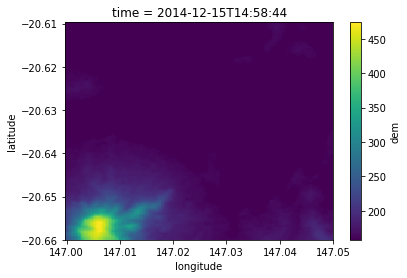

In [41]:
srtm_dem1sv1_0.dem.plot()
srtm_dem1sv1_0 = None

# Load Radiometrics

In [42]:
query = {
    'lat': (-20.61, -20.66),
    'lon': (147.0, 147.05),
    'measurements':['rad_k_equiv_conc_filtered','rad_th_equiv_conc_filtered','rad_u_equiv_conc_filtered']
}

dc = datacube.Datacube()
radiometrics = dc.load(product='gamma_ray', **query)

In [43]:
radiometrics.rad_u_equiv_conc_filtered.max()
# Previously: array(3.2456936836242676)

<xarray.DataArray 'rad_u_equiv_conc_filtered' ()>
array(3.2456936836242676)

In [44]:
radiometrics

<xarray.Dataset>
Dimensions:                     (latitude: 50, longitude: 50, time: 1)
Coordinates:
  * time                        (time) datetime64[ns] 2015-10-15
  * latitude                    (latitude) float64 -20.61 -20.61 -20.61 ...
  * longitude                   (longitude) float64 147.0 147.0 147.0 147.0 ...
Data variables:
    rad_k_equiv_conc_filtered   (time, latitude, longitude) float32 0.024999 ...
    rad_th_equiv_conc_filtered  (time, latitude, longitude) float32 0.0309571 ...
    rad_u_equiv_conc_filtered   (time, latitude, longitude) float32 -0.720119 ...
Attributes:
    crs:      GEOGCS["GEOCENTRIC DATUM of AUSTRALIA",DATUM["GDA94",SPHEROID["...

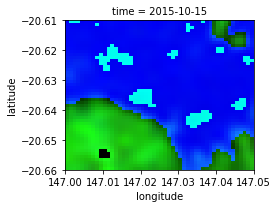

In [45]:
plot_rgb(radiometrics, 20)
radiometrics = None

# Load NBAR

In [46]:
nbar = dc.load(product='ls5_nbart_albers', y=(-18.7896944682,-18.7896944684), x=(146.073501475,146.073501476))

In [47]:
nbar

<xarray.Dataset>
Dimensions:  (time: 327, x: 1, y: 1)
Coordinates:
  * time     (time) datetime64[ns] 1986-08-17T23:38:20.500000 ...
  * y        (y) float64 -2.091e+06
  * x        (x) float64 1.478e+06
Data variables:
    blue     (time, y, x) int16 185 295 1256 447 407 574 2678 350 2682 2773 ...
    green    (time, y, x) int16 354 513 1358 598 619 717 6337 596 6486 4721 ...
    red      (time, y, x) int16 310 486 1383 631 649 810 6009 575 5991 4735 ...
    nir      (time, y, x) int16 1309 2432 2537 2304 2321 2515 7711 2482 8148 ...
    swir1    (time, y, x) int16 866 1718 2270 2067 2049 2157 5675 1955 5584 ...
    swir2    (time, y, x) int16 381 830 1391 1052 1124 1134 4176 940 3413 ...
Attributes:
    crs:      EPSG:3577

In [48]:
nbar = None

## MODIS Landsat time series

In [49]:
modis = dc.load(
    product='modis_mcd43a4_tile', 
    longitude=132.1,
    latitude=-27.5, 
    time=('2000-1-1', '2000-5-1'), 
    resolution=(-500,500), 
    # measurements=('Nadir_Reflectance_Band1','Nadir_Reflectance_Band4','Nadir_Reflectance_Band3'),
)

In [50]:
# Josh archived all of this product.
#modis.Nadir_Reflectance_Band1.min()
assert len(modis) == 0

modis

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*

In [51]:
modis = None

# Load rainfall

In [52]:
rain = dc.load(product='bom_rainfall_grids', longitude=132.1, latitude=-27.5, time=('2000-1-1', '2001-1-1'))

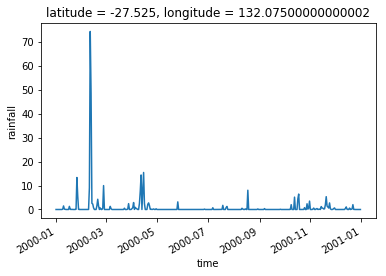

In [53]:
rain.rainfall.sel(longitude=132.1, latitude=-27.500001, method='nearest'). plot()

In [54]:
rain = None

## 1. Routine national scale product generation. Specifically, Version 2 will include national collections of:
    
 Water Observations from Space.

In [55]:
dc.index.datasets.search_eager(product='srtm_dem1sv1_0')

[Dataset <id=007f754d-6b3b-4a34-beaf-557c4eff2daa type=srtm_dem1sv1_0 location=/g/data/v10/AGDCv2/indexed_datasets/srtm/Elevation_1secSRTM_DEMs_v1.0_DEMSH_Mosaic_dem1sv1_0.yaml>]

In [56]:
rain_ds = dc.index.datasets.search_eager(product='bom_rainfall_grids', time=Range(datetime(2001, 1, 1), datetime(2002, 1, 1)))

datasets_union_clip180(rain_ds).to_crs(geometry.CRS('EPSG:3577'))

Geometry(POLYGON ((-1653001.91713634 -4992823.38195036,-1669479.35576637 -4888562.72164336,-1686059.9405326 -4783649.40624165,-1702735.69770219 -4678133.88937894,-1719498.87797482 -4572065.20459653,-1736341.95151559 -4465490.99677279,-1753257.60277401 -4358457.55490568,-1770238.72513968 -4251009.84592903,-1787278.41547946 -4143191.54927854,-1804369.9685957 -4035045.091957,-1821506.87164047 -3926611.68387806,-1838682.79851627 -3817931.35329609,-1855891.60428951 -3709042.98215426,-1873127.31963985 -3599984.34120652,-1890384.14536488 -3490792.12478911,-1907656.44695683 -3381501.98513614,-1924938.74926544 -3272148.5661504,-1942225.7312586 -3162765.53655517,-1959512.22089045 -3053385.62236614,-1976793.19008477 -2944040.6386342,-1994063.74983965 -2834761.52042014,-2011319.14545838 -2725578.35297147,-2028554.75190983 -2616520.40107926,-2045766.06932083 -2507616.13760022,-2062948.71860187 -2398893.27113481,-2080098.4372068 -2290378.77285768,-2097211.07502643 -2182098.902501,-2114282.59041524 -

In [57]:
rain_ds = None

In [58]:
plot_folium([
    datasets_union_clip180(
        dc.index.datasets.search_eager(
            product='bom_rainfall_grids', 
            time=Range(datetime(2001, 1, 1), datetime(2002, 1, 1))
        )
    )
])

In [59]:
plot_folium([
    datasets_union(
        dc.index.datasets.search_eager(
            product='srtm_dem1sv1_0',  
            time=Range(datetime(2001, 1, 1), datetime(2020, 1, 1))
        )
    )
])

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9108"]],AUTHORITY["EPSG","4326"]]


In [60]:
# Josh archived all of this
modis_mcd43a4 = dc.load(
    product='modis_mcd43a4_tile',
    x=(145,145.1),
    y=(-38.0,-38.1),
    resolution=(-500,500),
    time=('2000-01-01', '2001-01-01'), 
    measurements=(
        'Nadir_Reflectance_Band1',
        'Nadir_Reflectance_Band4',
        'Nadir_Reflectance_Band3'
    )
)
modis_mcd43a4

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*

# Multiband file or subdataset support example

In [65]:
%%script false
# Modis disabled. Josh archived all of this

modis_mcd43a1 = dc.load(
    product='modis_mcd43a1_tile',
    x=(145,145.1),
    y=(-38.0,-38.1),
    resolution=(-500,500),
    time=('2001-01-01', '2001-01-01'), 
    measurements=(
        'BRDF_Albedo_Parameters_Band1',
        'BRDF_Albedo_Parameters_Band2',
        'BRDF_Albedo_Parameters_Band3'
    )
)

In [66]:

# modis_mcd43a1.BRDF_Albedo_Parameters_Band1[0][1]

In [67]:
# plot_rgb(modis_mcd43a1, 1000)

# Plot MODIS timeseries

In [68]:
# plot_rgb(modis_mcd43a4, 3000)

In [69]:
# plot_folium([datasets_union(dc.index.datasets.search_eager(product='ls5_nbart_albers', time=Range(datetime(1986, 1, 1), datetime(1988, 1, 1))))])

# Query, load and plot NBART example 

/g/data/v10/public/modules/agdc-py3-env/20170713/envs/agdc/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in less_equal
  if not reflexive


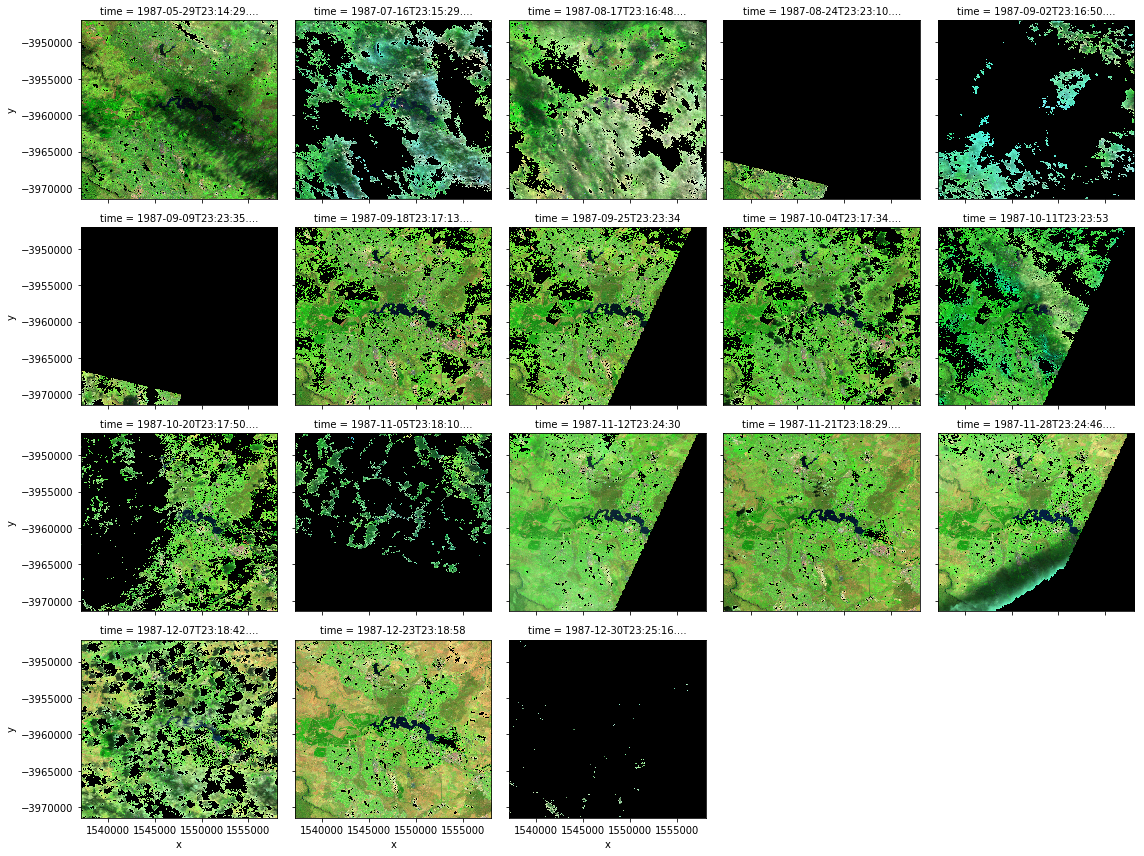

In [70]:
query = {
    'time': ('1987-01-01', '1988-01-01'),
    'lat': (-35.2, -35.4),
    'lon': (149.0, 149.2),
}

dc = datacube.Datacube()
nbart = dc.load(
    product='ls5_nbart_albers',
    measurements=['swir2', 'nir', 'red'], 
    group_by='solar_day' , 
    **query
)

plot_rgb(nbart, 3500)
nbart = None

# Query, load and plot WoFS example 
# Construction of the Burdekin Dam completed in 1987

In [72]:
%%script false
# Disabled: WOfS has been removed.

query = {
    'time': ('1986-01-01', '1988-01-01'),
    'lat': (-20.61, -20.67),
    'lon': (147.0, 147.15),
}

wofs = dc.load(product='wofs_albers', group_by='solar_day', **query)
wofs

In [73]:
%%script false
wofs.water.flags_definition
pandas.DataFrame.from_dict(masking.get_flags_def(wofs), orient='index')

In [74]:
%%script false

water = masking.make_mask(wofs, result='clear_wet')
water.water.plot(col='time', col_wrap=5, robust=True, cmap='gray')

In [75]:
%%script false
# Number of clear water pixels - no group by solar day to exclude scene overlap

water_sum = water.water.sum('time').where(water.water.sum('time')!= 0)
water_sum.plot(cmap='rainbow', robust=True)

In [76]:
wofs = None
water = None
water_sum = None

 Intertidal Characterisation.

In [77]:
# incomplete for v2 - water classification only - confidence metrics continue to be a work in progress

 ## Landsat Fractional Cover.

In [78]:
plot_folium([
    datasets_union(
        dc.index.datasets.search_eager(
            product='ls5_fc_albers',
            time=Range(datetime(1987, 1, 1), datetime(1988, 1, 1))
        )
    )
])

EPSG:3577


/g/data/v10/public/modules/agdc-py3-env/20170713/envs/agdc/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in less_equal
  if not reflexive


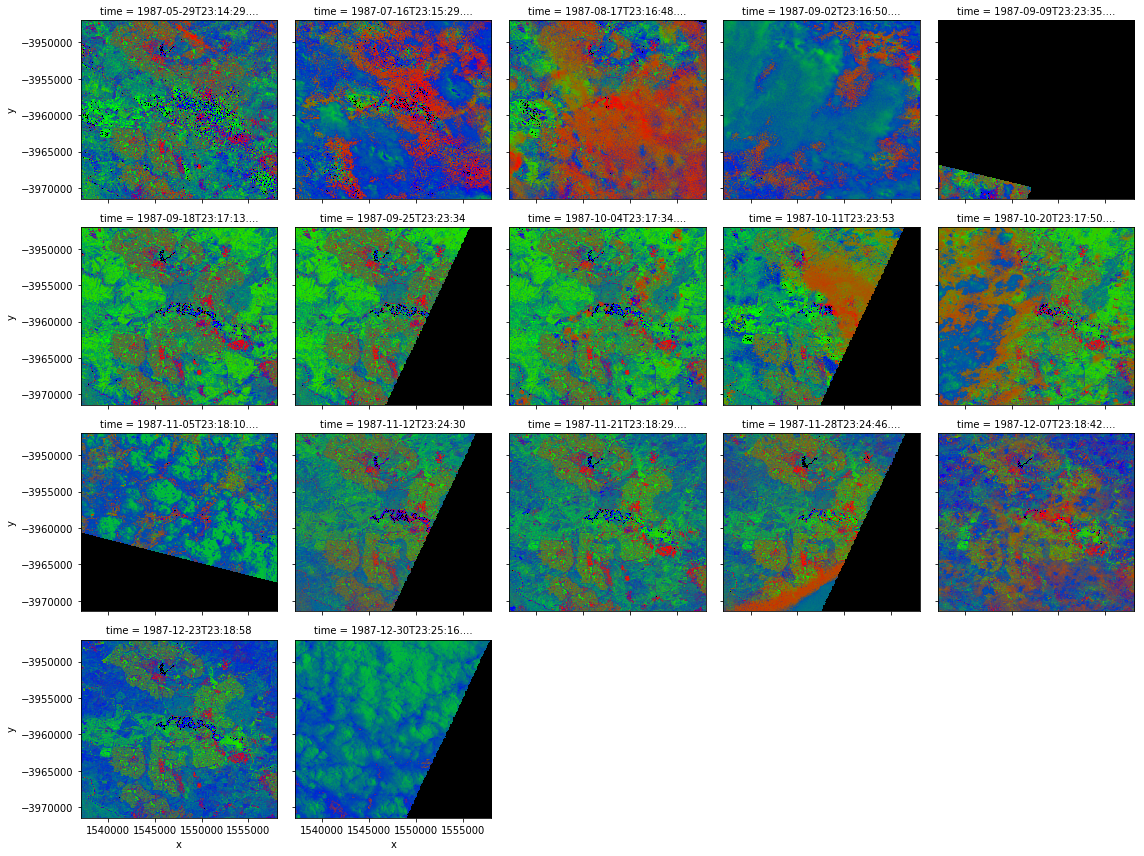

In [79]:
# Query, load and plot Fractional Cover example 

query = {
    'time': ('1987-01-01', '1988-01-01'),
    'lat': (-35.2, -35.4),
    'lon': (149.0, 149.2),
}

dc = datacube.Datacube()
fractional_cover = dc.load(
    product='ls5_fc_albers',
    measurements=['BS', 'PV', 'NPV'], 
    group_by='solar_day' , 
    **query
)

plot_rgb(fractional_cover, 100)
fractional_cover = None


## Pixel Quality

In [80]:
plot_folium([
    datasets_union(
        dc.index.datasets.search_eager(
            product='ls5_pq_albers',
            time=Range(datetime(1987, 1, 1), datetime(1988, 1, 1))
        )
    )
])

EPSG:3577


In [81]:
plot_folium([
    datasets_union(
        dc.index.datasets.search_eager(
            product='ls7_nbar_albers',
           time=Range(datetime(2004,2, 1), datetime(2004, 2, 16))
        )
    )
])

EPSG:3577


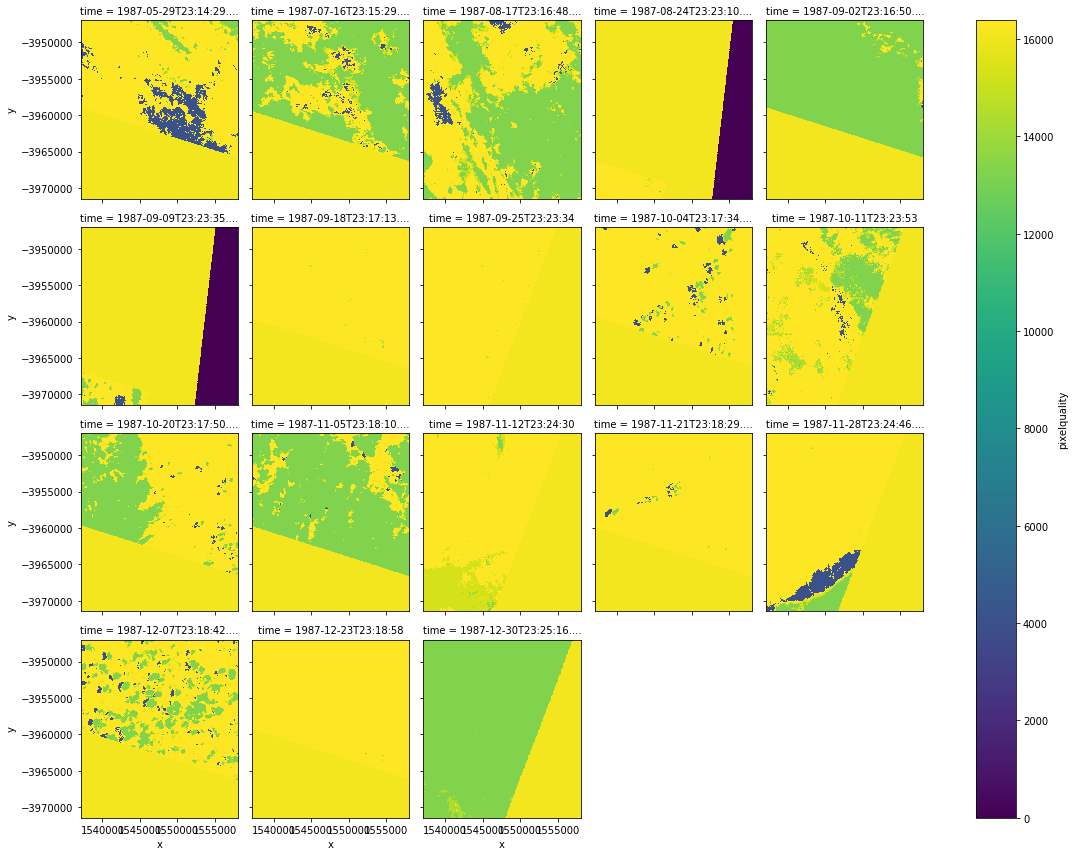

In [124]:
pq = dc.load(product='ls5_pq_albers', group_by='solar_day', **query)
pq.pixelquality.plot(col='time', col_wrap=5, robust=True)

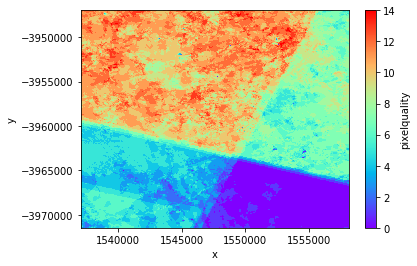

In [83]:
# Number of clear pixels based on ga_good_pixels default - no group by solar day to exclude scene overlap
clear_pixels = masking.make_mask(pq, ga_good_pixel=True)
clear_pixels.pixelquality.sum('time').plot(cmap='rainbow')

In [84]:
clear_pixels = None

 NDVI.

In [85]:
plot_folium([
    datasets_union(
        dc.index.datasets.search_eager(
            product='ls5_ndvi_albers',
            time=Range(datetime(1987,1, 1), datetime(1988, 1, 1))
        )
    )
])

EPSG:3577


In [86]:
#ndvi = dc.load(product='ls5_ndvi_albers', group_by='solar_day', **query )
#ndvi = mask_invalid_data(ndvi)
good_pixels = masking.make_mask(pq, ga_good_pixel=True)
#ndvi = ndvi.where(good_pixels.pixelquality)
#ndvi.ndvi.plot(col='time', col_wrap=5, robust=True, cmap='Greens')
good_pixels

<xarray.Dataset>
Dimensions:       (time: 18, x: 839, y: 979)
Coordinates:
  * time          (time) datetime64[ns] 1987-05-29T23:14:29.500000 ...
  * x             (x) float64 1.537e+06 1.537e+06 1.537e+06 1.537e+06 ...
  * y             (y) float64 -3.947e+06 -3.947e+06 -3.947e+06 -3.947e+06 ...
Data variables:
    pixelquality  (time, y, x) bool True True True True True True True True ...
Attributes:
    crs:      EPSG:3577

Landsat Surface reflectance statistical summaries:

    Seasonal medians; and

In [88]:
#ndvi.ndvi.median(dim='time').plot(robust=True, cmap='YlGn')

   Most-up-to-date observation.

In [89]:
# Most recent pixel mosaic function from cloud screen NBAR
#%run /g/data/v10/public/agdcv2_requirements/latest_pixel/agdc_pixel/pixel_test.py '60/(15,-40)'

In [90]:
#my_data

In [91]:
#my_data[15, -40].swir1.plot(cmap='rainbow', robust=True)


    
In some cases, these collections may be virtual, i.e. they are not pre-computed but rather
computed as they are needed.


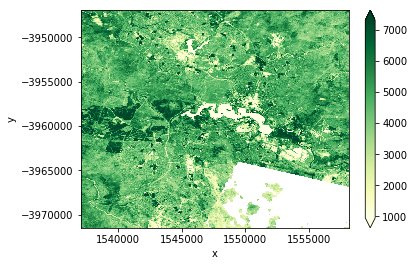

In [92]:
nbar = dc.load(product='ls5_nbar_albers', group_by='solar_day', **query )
nbar = nbar.where(good_pixels.pixelquality)
ndvi_on_the_fly = (nbar.nir-nbar.red)/(nbar.nir+nbar.red)*10000
ndvi_on_the_fly.median(dim='time').plot(robust=True, cmap='YlGn')

In [93]:
# diff = (ndvi_on_the_fly.median(dim='time') - ndvi.ndvi.median(dim='time'))

In [94]:
# diff.plot(robust=True) #error at level of noise due to *10000 scaling of floats

## 2. A user should be able to interact with these collections through a web browser including:#

Clicking on a pixel and displaying a time series (i.e., pixel drill).

In [95]:
# See Steven Ackerley / Andrew Hicks
# NCML through THREDDS
#!/g/data/v10/public/agdcv2-pixeldrill/pixeldrill -p ls5_nbart_albers

#Webpage to define it
!firefox http://dapds00.nci.org.au/thredds/ncss/grid/uc0/rs0_dev/all_the_ncmls/LS5_TM_FC/ncml/LS5_TM_FC_13_-43.ncml/pointDataset.html

In [96]:
#CSV URL for a drill
!firefox http://dapds00.nci.org.au/thredds/ncss/uc0/rs0_dev/all_the_ncmls/LS5_TM_FC/ncml/LS5_TM_FC_13_-43.ncml?var=BS&var=NPV&var=PV&latitude=-38.13&longitude=147.17&time_start=1986-08-21T23%3A18%3A40Z&time_end=2011-11-14T23%3A45%3A07Z&accept=csv


### Spatio-temporal (statistical) summaries that would allow users to easily answer questions such as:
    
    How frequently was water observed over catchment y during time period x; and


In [97]:
# not this time - you mean wofs right? - see example below for when the data is available


    What was the surface reflectance for area x at time y?

Link to [stats within a polygon](zonal-stats-pilbara.ipynb)

## 3. Earth Observation (EO) scientists and allied domain specialists will be able to undertake exploratory data analysis. In general this would mean a user will be able to easily retrieve, investigate, visualise, develop algorithms, test, iterate, visualise results and interpret them in the context of other spatio-temporal datasets.

 A key demonstration of this capability will be the availability of functions and data
structures to enable Landsat/MODIS blending.

### Input data
The AGDC will use the following data collections:
 Landsat: TM, ETM+ and OLI/TIRS.
 MODIS: Collection 6 MOD09 (granule) and MOD43 (sinusoidal tiles) that will provide variables
necessary for the Landsat-MODIS blending algorithm.

In [98]:
dc.list_products()

name  \
id                                 
36            bom_rainfall_grids   
32                      dsm1sv10   
53                     gamma_ray   
42                 ls5_fc_albers   
2               ls5_level1_scene   
6                ls5_nbar_albers   
3                 ls5_nbar_scene   
26              ls5_nbart_albers   
4                ls5_nbart_scene   
41               ls5_ndvi_albers   
23                 ls5_pq_albers   
5                   ls5_pq_scene   
1   ls5_satellite_telemetry_data   
44                 ls7_fc_albers   
9               ls7_level1_scene   
21               ls7_nbar_albers   
10                ls7_nbar_scene   
29              ls7_nbart_albers   
11               ls7_nbart_scene   
45               ls7_ndvi_albers   
22                 ls7_pq_albers   
12                  ls7_pq_scene   
8   ls7_satellite_telemetry_data   
47                 ls8_fc_albers   
40          ls8_level1_oli_scene   
14              ls8_level1_scene   
19               ls8_nbar_albers   
60           ls8_nbar_oli_albers   
57            ls8_nbar_oli_scene   
15                ls8_nbar_scene   
28              ls8_nbart_albers   
61          ls8_nbart_oli_albers   
58           ls8_nbart_oli_scene   
16               ls8_nbart_scene   
55               ls8_ndvi_albers   
20                 ls8_pq_albers   
59              ls8_pq_oli_scene   
17                  ls8_pq_scene   
13  ls8_satellite_telemetry_data   
49            modis_mcd43a1_tile   
50            modis_mcd43a2_tile   
51            modis_mcd43a3_tile   
52            modis_mcd43a4_tile   
56                srtm_dem1sv1_0   
46                   wofs_albers   
62         wofs_modified_albers2   

                                          description  gqa_iterative_mean_xy  \
id                                                                             
36  Interpolated Rain Gauge Precipitation 1-Day Au...                    NaN   
32                               DSM 1sec Version 1.0                    NaN   
53  The 2015 radiometric or gamma-ray grid of Aust...                    NaN   
42  Landsat 5 Fractional Cover 25 metre, 100km til...                    NaN   
2       Landsat 5 Level 1 At-sensor Radiance 25 metre                    NaN   
6   Landsat 5 Surface Reflectance NBAR 25 metre, 1...                    NaN   
3                             Landsat 5 NBAR 25 metre                    NaN   
26  Landsat 5 Surface Reflectance NBART 25 metre, ...                    NaN   
4                            Landsat 5 NBART 25 metre                    NaN   
41  Landsat 5 Normalised Difference Vegetation Ind...                    NaN   
23  Landsat 5 Pixel Quality 25 metre, 100km tile, ...                    NaN   
5                               Landsat 5 PQ 25 metre                    NaN   
1                  Landsat 5 Satellite Telemetry Data                    NaN   
44  Landsat 7 Fractional Cover 25 metre, 100km til...                    NaN   
9       Landsat 7 Level 1 At-sensor Radiance 25 metre                    NaN   
21  Landsat 7 Surface Reflectance NBAR 25 metre, 1...                    NaN   
10                            Landsat 7 NBAR 25 metre                    NaN   
29  Landsat 7 Surface Reflectance NBART 25 metre, ...                    NaN   
11                           Landsat 7 NBART 25 metre                    NaN   
45  Landsat 7 Normalised Difference Vegetation Ind...                    NaN   
22  Landsat 7 Pixel Quality 25 metre, 100km tile, ...                    NaN   
12                              Landsat 7 PQ 25 metre                    NaN   
8                  Landsat 7 Satellite Telemetry Data                    NaN   
47  Landsat 8 Fractional Cover 25 metre, 100km til...                    NaN   
40  Landsat 8 OLI Level 1 At-sensor Radiance 25 metre                    NaN   
14  Landsat 8 Level 1 OLI-TIRS At-sensor Radiance ...                    NaN   
19  Landsat 8 Surface Reflectance NBAR 25 metre, 1...      

It will also include the SRTM 3 second DSM and 1 and 3 second DEMs.

In [99]:
dc.list_measurements()

aliases  \
product               measurement                                                     
bom_rainfall_grids    rainfall                                                  NaN   
dsm1sv10              elevation                                                 NaN   
gamma_ray             rad_air_dose_rate_unfiltered                              NaN   
                      rad_k_equiv_conc_unfiltered                               NaN   
                      rad_u_equiv_conc_unfiltered                               NaN   
                      rad_th_equiv_conc_unfiltered                              NaN   
                      rad_air_dose_rate_filtered                                NaN   
                      rad_k_equiv_conc_filtered                                 NaN   
                      rad_u_equiv_conc_filtered                                 NaN   
                      rad_th_equiv_conc_filtered                                NaN   
                      rad_ratio_tk                                              NaN   
                      rad_ratio_u2t                                             NaN   
                      rad_ratio_uk                                              NaN   
                      rad_ratio_ut                                              NaN   
ls5_fc_albers         BS                                                     [bare]   
                      PV                                                [green_veg]   
                      NPV                                                [dead_veg]   
                      UE                                                      [err]   
ls5_nbar_albers       blue                                           [band_1, blue]   
                      green                                         [band_2, green]   
                      red                                             [band_3, red]   
                      nir                                             [band_4, nir]   
                      swir1                                         [band_5, swir1]   
                      swir2                                         [band_7, swir2]   
ls5_nbar_scene        1                                              [band_1, blue]   
                      2                                             [band_2, green]   
                      3                                               [band_3, red]   
                      4                                               [band_4, nir]   
                      5                                             [band_5, swir1]   
                      7                                             [band_7, swir2]   
...                                                                             ...   
modis_mcd43a3_tile    Albedo_WSA_shortwave                                      NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_Band1                  NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_Band2                  NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_Band3                  NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_Band4                  NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_Band5                  NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_Band6                  NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_Band7                  NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_nir                    NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_shortwave              NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_vis                    NaN   
modis_mcd43a4_tile    BRDF_Albedo_Band_Mandatory_Quality_Band1                  NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_Band2                  NaN   
                      BRDF_Albedo_Band_Mandatory_Quality_Band3            

At a minimum, the Australian implementation of the AGDC will cover all of continental Australia plus a
one tile buffer and the Great Barrier Reef. However, the Boards preference would be for the Version
2 to also cover all Commonwealth Marine Reserves.

In [100]:
plot_folium([
    datasets_union(
        dc.index.datasets.search_eager(
            product='ls8_nbar_albers',
            time=Range(datetime(2014,1, 1), datetime(2015, 1, 1))
        )
    )
])

EPSG:3577


All data collections that are included in the Australian implementation of the AGDC will:
 Have a CC BY Attribution 3.0 or CC BY Attribution 4.0 license. 

In [101]:
!ncdump -h '/g/data/rs0/datacube/002/LS5_TM_NBAR/14_-40/LS5_TM_NBAR_3577_14_-40_19860821231816000000.nc' | grep license

		:license = "CC BY Attribution 4.0 International License" ;


The use of a collection with a
different licence will require approval of the AGDC Programme Board; and
 Be in netCDF 4 format and will comply with relevant CF conventions;.

In [102]:
import compliance_checker

In [103]:
compliance_checker.__version__

'3.0.4'

In [104]:
from __future__ import print_function
import argparse
import sys

import cf_units
from compliance_checker.runner import ComplianceChecker, CheckSuite
from compliance_checker import __version__

ds_loc = '/g/data/rs0/datacube/002/LS5_TM_NBAR/14_-40/LS5_TM_NBAR_3577_14_-40_19860821231816000000.nc'

cs = CheckSuite()
cs.load_all_available_checkers()

was_success, errors = ComplianceChecker.run_checker(
    ds_loc=ds_loc, 
    checker_names=['cf'], # 'acdd'?
    verbose=0, 
    criteria='normal', 
    output_filename='-',
    # Skipping:
    # - check_dimension_order: 
    #      Our files don't contain all the lats/lons as an auxiliary 
    #      cordinate var as it's unnecessary for any software we've 
    #      tried.
    #      It may be added at some point in the future, and this check 
    #      should be re-enabled.
    skip_checks=['check_dimension_order']
)
# missing source attribute: skippable according to Damien
# assert was_success, "Compliance failed."



--------------------------------------------------------------------------------
                    The dataset scored 245 out of 246 points                    
                              during the cf check                               
--------------------------------------------------------------------------------
                               Scoring Breakdown:                               


                                 High Priority                                  
--------------------------------------------------------------------------------
    Name                            :Priority: Score
§2.2 Valid netCDF data types            :3:    11/11
§2.4 Unique dimensions                  :3:    11/11
§3.1 Variable blue contains valid CF un :3:     3/3
§3.1 Variable green contains valid CF u :3:     3/3
§3.1 Variable nir contains valid CF uni :3:     3/3
§3.1 Variable red contains valid CF uni :3:     3/3
§3.1 Variable swir1 contains valid CF u :3:     3/3
§3.1 Varia

In [105]:
help(ComplianceChecker.run_checker)

Help on method run_checker in module compliance_checker.runner:

run_checker(ds_loc, checker_names, verbose, criteria, skip_checks=None, output_filename='-', output_format='text') method of builtins.type instance
    Static check runner.
    
    @param  ds_loc          Dataset location (url or file)
    @param  checker_names    List of string names to run, should match keys of checkers dict (empty list means run all)
    @param  verbose         Verbosity of the output (0, 1, 2)
    @param  criteria        Determines failure (lenient, normal, strict)
    @param  output_filename Path to the file for output
    @param  skip_checks     Names of checks to skip
    @param  output_format   Format of the output
    
    @returns                If the tests failed (based on the criteria)



## Output Products
By June 30, 2016 the Australian implementation of the AGDC will ensure that the products being
produced are supported by and hosted on the RDS.

In [106]:
!ls /g/data/rs0/datacube/002

LS5_TM_NBAR   LS5_TM_PQ     LS7_ETM_NBART  LS8_OLI_NBAR   LS8_OLI_PQ
LS5_TM_NBART  LS7_ETM_NBAR  LS7_ETM_PQ	   LS8_OLI_NBART


In [107]:
!ls /g/data/fk4/datacube/002

LS5_TM_FC  LS7_ETM_FC  LS8_OLI_FC


## Technical Requirements
In line with the use-case patterns outlined above, Version 2 will support:
 Data-fusion and analysis across heterogeneous gridded data collections from different
domains.

In [108]:
albers_grid = dc.load(
    product='ls5_nbart_albers', 
    group_by='solar_day',
    measurements=['swir2', 'nir', 'blue'], 
    **query
)

In [109]:
sinusoidal_grid = dc.load(
    product='ls5_nbar_albers',  
    group_by='solar_day', 
    measurements=['swir2', 'nir', 'blue'],
    output_crs='PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",\
                DATUM["Not specified (based on custom spheroid)",\
                SPHEROID["Custom spheroid",6371007.181,0]],\
                PRIMEM["Greenwich",0],\
                UNIT["degree",0.0174532925199433]],\
                PROJECTION["Sinusoidal"],\
                PARAMETER["longitude_of_center",0],\
                PARAMETER["false_easting",0],\
                PARAMETER["false_northing",0],\
                UNIT["Meter",1]]',
    resolution=(-250,250), 
    **query
)

/g/data/v10/public/modules/agdc-py3-env/20170713/envs/agdc/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in less_equal
  if not reflexive


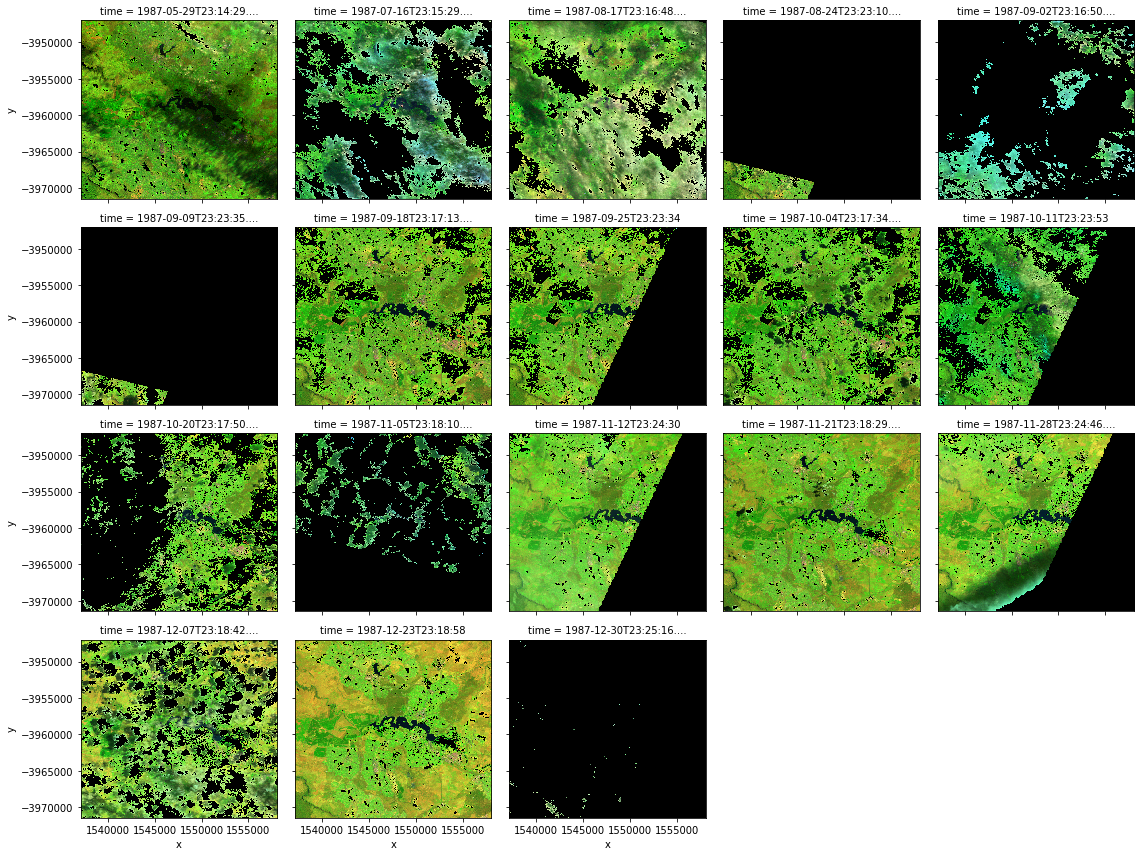

In [110]:
plot_rgb(albers_grid, 3500)
albers_grid = None

/g/data/v10/public/modules/agdc-py3-env/20170713/envs/agdc/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in less_equal
  if not reflexive


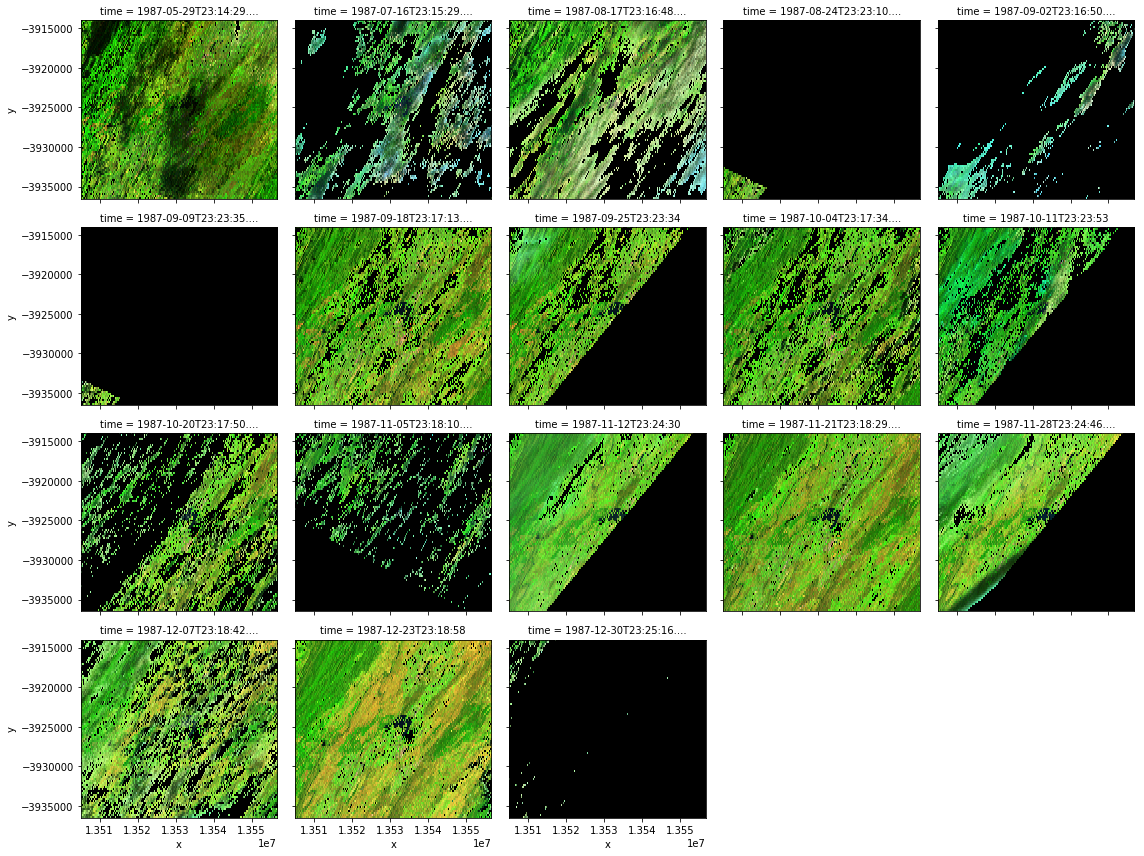

In [111]:
plot_rgb(sinusoidal_grid, 3500)
sinusoidal_grid = None

Tuneable configuration, at ingest, of multidimensional files (eg. chunking, compression type,
dimension depth).

In [112]:
!datacube product add --help

Usage: datacube product add [OPTIONS] [FILES]...

  Add or update products in the index

Options:
  --allow-exclusive-lock / --forbid-exclusive-lock
                                  Allow index to be locked from other users
                                  while updating (default: false)
  -h, --help                      Show this message and exit.


## A data retrieval mechanism that provides the ability to:


Obtain seamless subsets of data across storage unit boundaries;


In [113]:
seamless_query = {
    'time': ('2011-6-1', '2011-6-30'),
    'lat': (-20, -30),
    'lon': (132.0, 132.01),
}

In [114]:
seamless_subset = dc.load(
    product='ls5_nbar_albers', 
    measurements=['swir2', 'nir', 'blue'], 
    group_by='solar_day', 
    **seamless_query
)

In [115]:
seamless_subset.y.max() - seamless_subset.y.min() #distance in metres

<xarray.DataArray 'y' ()>
array(1119225.0)

In [116]:
seamless_subset.x.max() - seamless_subset.x.min() #distance in metres

<xarray.DataArray 'x' ()>
array(1025.0)

In [117]:
seamless_subset.extent.points

/g/data/v10/public/modules/agdc-py3-env/20170713/envs/agdc/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in less_equal
  if not reflexive


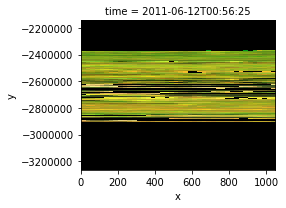

In [118]:
plot_rgb(seamless_subset, 3000)

In [119]:
# With the Grid Workflow class demonstrate seamless spatial query across tile boundaries
from datacube.api import GridWorkflow  

In [120]:
gw = GridWorkflow(dc.index, product='ls5_nbar_albers')

In [121]:
# The query straddles multiple tiles - indexes shown below
gw.list_cells(
    product = 'ls5_nbar_albers', 
    **seamless_query
).keys()

dict_keys([(0, -26), (0, -29), (0, -24), (0, -28), (0, -30), (0, -27), (0, -25)])


Filter data based on observation attribute (for example, pixel quality);

bits  \
blue_saturated                                                   0   
cloud_acca                                                      10   
cloud_fmask                                                     11   
cloud_shadow_acca                                               12   
cloud_shadow_fmask                                              13   
contiguous                                                       8   
ga_good_pixel       [13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]   
green_saturated                                                  1   
land_sea                                                         9   
nir_saturated                                                    3   
red_saturated                                                    2   
swir1_saturated                                                  4   
swir2_saturated                                                  7   
tir_saturated                                                    5   

                                                           values  \
blue_saturated                            {'0': True, '1': False}   
cloud_acca                        {'0': 'cloud', '1': 'no_cloud'}   
cloud_fmask                       {'0': 'cloud', '1': 'no_cloud'}   
cloud_shadow_acca   {'0': 'cloud_shadow', '1': 'no_cloud_shadow'}   
cloud_shadow_fmask  {'0': 'cloud_shadow', '1': 'no_cloud_shadow'}   
contiguous                                {'0': False, '1': True}   
ga_good_pixel                                     {'16383': True}   
green_saturated                           {'0': True, '1': False}   
land_sea                                {'0': 'sea', '1': 'land'}   
nir_saturated                             {'0': True, '1': False}   
red_saturated                             {'0': True, '1': False}   
swir1_saturated                           {'0': True, '1': False}   
swir2_saturated                           {'0': True, '1': False}   
tir_saturated                             {'0': True, '1': False}   

                                                         description  
blue_saturated                                Blue band is saturated  
cloud_acca                                              Cloud (ACCA)  
cloud_fmask                                            Cloud (Fmask)  
cloud_shadow_acca                                Cloud Shadow (ACCA)  
cloud_shadow_fmask                              Cloud Shadow (Fmask)  
contiguous          All bands for this pixel contain non-null values  
ga_good_pixel                                     Best Quality Pixel  
green_saturated                              Green band is saturated  
land_sea                                                 Land or Sea  
nir_saturated                                  NIR band is saturated  
red_saturated                                  Red band is saturated  
swir1_saturated                              SWIR1 band is saturated  
swir2_saturated                              SWIR2 band is saturated  
tir_saturated                     Thermal Infrared band is saturated

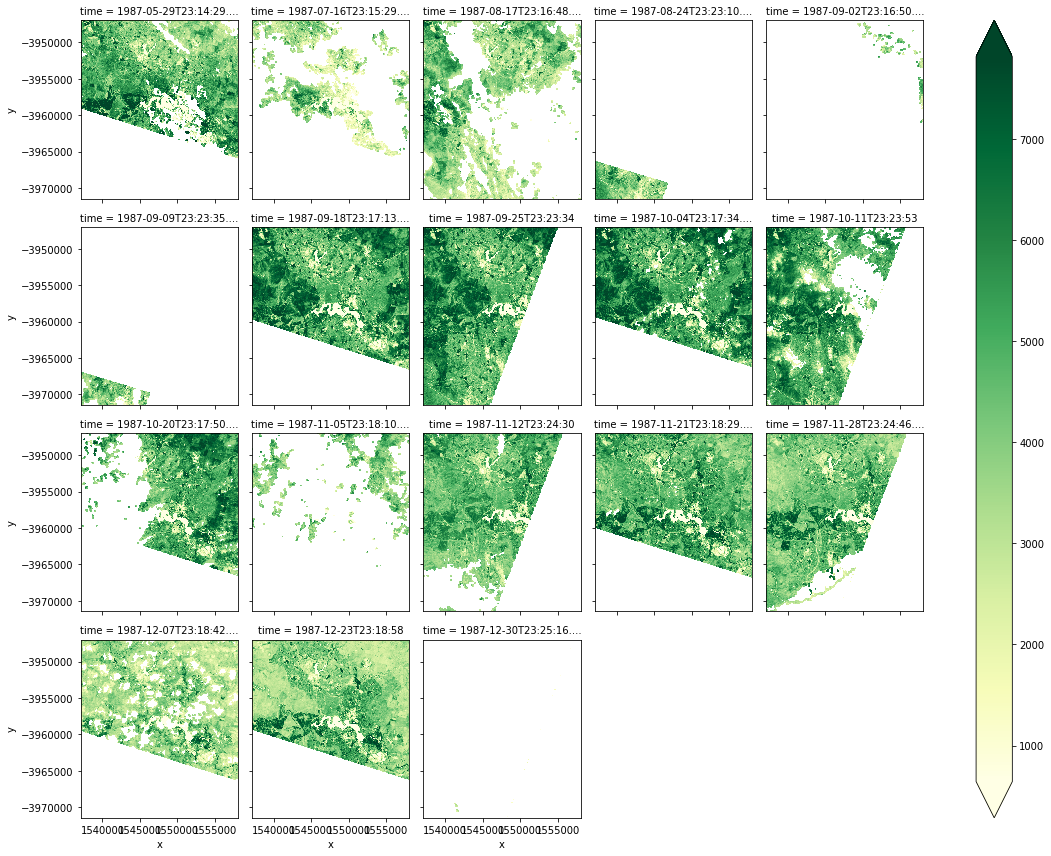

In [128]:

# Load some NDVI
nbar = dc.load(product='ls5_nbar_albers', group_by='solar_day', **query) 
ndvi = (nbar.nir - nbar.red) / (nbar.nir + nbar.red) * 10000
nbar = None

# Mask the valid data
ndvi = mask_invalid_data(ndvi)
# Create a mask for the data with artefacts
good_pixels = masking.make_mask(pq, ga_good_pixel=True) 
# Apply artefact mask
ndvi = ndvi.where(good_pixels.pixelquality) 

# Plot the result
ndvi.plot(col='time', col_wrap=5, robust=True, cmap='YlGn') 
ndvi = None

pandas.DataFrame.from_dict(
    masking.get_flags_def(pq), 
    orient='index'
)


Define the spatio-temporal range of interest independent of data storage unit; and define the specific sensor or combination of sensor data to be analysed.



Define the specific sensor or combination of sensor data to be analysed.


In [129]:
multi_sensor_query = {
    'time': ('2013-06-01', '2014-01-01'),
    'lat': (-35.2, -35.4),
    'lon': (149.0, 149.2),
}

products = ['ls7_nbar_albers', 'ls8_nbar_albers']

# Find similarly named measurements
measurements = set(dc.index.products.get_by_name(products[0]).measurements.keys())
for prod in products[1:]:
    measurements.intersection(dc.index.products.get_by_name(products[0]).measurements.keys())

datasets = []
for prod in products:
    ds = dc.load(product=prod, measurements=measurements, **multi_sensor_query)
    ds['product'] = ('time', numpy.repeat(prod, ds.time.size))
    datasets.append(ds)

combined = xarray.concat(datasets, dim='time')
combined = combined.isel(time=combined.time.argsort())  # sort along time dim

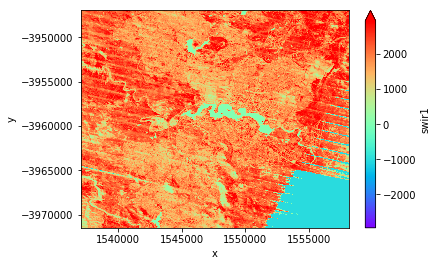

In [130]:
combined.swir1.median(dim='time').plot(col_wrap=5, robust=True, cmap='rainbow')

The API will provide a simplified conceptual model for data query and analysis based
on an n-dimensional array abstraction;

In [131]:
combined.data_vars

Data variables:
    blue     (time, y, x) int16 -999 -999 -999 -999 -999 -999 -999 -999 -999 ...
    green    (time, y, x) int16 -999 -999 -999 -999 -999 -999 -999 -999 -999 ...
    nir      (time, y, x) int16 -999 -999 -999 -999 -999 -999 -999 -999 -999 ...
    swir1    (time, y, x) int16 -999 -999 -999 -999 -999 -999 -999 -999 -999 ...
    red      (time, y, x) int16 -999 -999 -999 -999 -999 -999 -999 -999 -999 ...
    swir2    (time, y, x) int16 -999 -999 -999 -999 -999 -999 -999 -999 -999 ...
    product  (time) <U15 'ls7_nbar_albers' 'ls7_nbar_albers' ...

In [132]:
combined = None

During EDA, lazy evaluation of calculations so only those results that are in use are
computed; and

In [133]:
# CSIRO Peter Wang - link to notebook

Support for calculations on arrays that are larger than core memory.

In [134]:
# Dask Example
bigdata = dc.load(
    product='ls7_nbart_albers',
    longitude=(132.0, 137.0), 
    latitude=(-20, -25), 
    time=('2011-6-1', '2011-6-30'),
    dask_chunks={'x': 200, 'y': 200, 'time': 5} 
)

In [135]:
bigdata

Error opening source dataset: NetCDF:/g/data/rs0/datacube/002/LS7_ETM_NBART/1_-25/LS7_ETM_NBART_3577_1_-25_2011_v1493797701.nc:blue
Error opening source dataset: NetCDF:/g/data/rs0/datacube/002/LS7_ETM_NBART/0_-27/LS7_ETM_NBART_3577_0_-27_2011_v1493797701.nc:blue
Error opening source dataset: NetCDF:/g/data/rs0/datacube/002/LS7_ETM_NBART/5_-22/LS7_ETM_NBART_3577_5_-22_2011_v1496398241.nc:blue
Error opening source dataset: NetCDF:/g/data/rs0/datacube/002/LS7_ETM_NBART/0_-23/LS7_ETM_NBART_3577_0_-23_2011_v1493797701.nc:blue
Error opening source dataset: NetCDF:/g/data/rs0/datacube/002/LS7_ETM_NBART/0_-25/LS7_ETM_NBART_3577_0_-25_2011_v1493797701.nc:blue


ValueError: invalid window: row range (0, -6037)

In [136]:
bigdata.mean(dim='time')
# If big data larger than memory will be chunked and run

Error opening source dataset: NetCDF:/g/data/rs0/datacube/002/LS7_ETM_NBART/0_-27/LS7_ETM_NBART_3577_0_-27_2011_v1493797701.nc:blue
Error opening source dataset: NetCDF:/g/data/rs0/datacube/002/LS7_ETM_NBART/1_-25/LS7_ETM_NBART_3577_1_-25_2011_v1493797701.nc:blue
Error opening source dataset: NetCDF:/g/data/rs0/datacube/002/LS7_ETM_NBART/0_-25/LS7_ETM_NBART_3577_0_-25_2011_v1493797701.nc:blue
Error opening source dataset: NetCDF:/g/data/rs0/datacube/002/LS7_ETM_NBART/5_-22/LS7_ETM_NBART_3577_5_-22_2011_v1496398241.nc:blue
Error opening source dataset: NetCDF:/g/data/rs0/datacube/002/LS7_ETM_NBART/4_-28/LS7_ETM_NBART_3577_4_-28_2011_v1496398241.nc:blue
Error opening source dataset: NetCDF:/g/data/rs0/datacube/002/LS7_ETM_NBART/5_-24/LS7_ETM_NBART_3577_5_-24_2011_v1496398241.nc:blue
Error opening source dataset: NetCDF:/g/data/rs0/datacube/002/LS7_ETM_NBART/0_-23/LS7_ETM_NBART_3577_0_-23_2011_v1493797701.nc:blue


ValueError: invalid window: row range (0, -14037)

Error opening source dataset: NetCDF:/g/data/rs0/datacube/002/LS7_ETM_NBART/4_-26/LS7_ETM_NBART_3577_4_-26_2011_v1496398241.nc:blue


In [137]:
bigdata.blue.visualize()

AttributeError: 'DataArray' object has no attribute 'visualize'

Continental scale product generation will be based off the continental workflows from the
current ADGC v1 API, however it will be modified to use the version 2 data retrieval
mechanism.

In [138]:
# See stats, wofs and ingestion

The ability to manage results of calculations as a temporary/private data cube for further
analysis.

In [139]:
# See remote cube example above

Web based delivery of products through WMS, WCS, CS/W, OpenDAP services.

In [140]:
!firefox http://dapds00.nci.org.au/thredds/catalogs/rs0/catalog.html 

Basic provenance that records information about an analysis result/product such as what
datasets, software version, ancillary data and algorithm was used to produce the product.
Wherever possible, Version 2 will adopt and adapt existing software, services and standards.

In [141]:
#combined.variables

In [142]:
# See sources example above 

## Other Requirements
### The Project Plan will be supported by:
 A transition plan and timetable for moving AGDC production from Version 1 to Version 2 of
the AGDC (including controlled updates to data collections that are already accessible via
RDS);

In [143]:
!firefox http://dapds00.nci.org.au/thredds/catalogs/rs0/catalog.html 

A software release and management plan;

Approved by Robert Woodcock, Matt Paget and Simon Oliver 19/01/2016

1.	Develop branch - aim is to have this not broken - integration tests should enforce expected functionality on this branch 
a.	integration tests are trying to enforce this
b.	Develop is the main collaboration branch
i.	To discourage keeping feature branches separate for too long - small incremental improvements are better
2.	Master to be replaced with git tagged releases (these should not deviate greatly from develop)
a.	The process to get to release could be :
i.	Decide when develop is feature complete
ii.	Branch it to a release candidate
iii.	Test the release candidate (manual - apply patches as needed to branch)
iv.	Tag release
3.	Continuous integration tests are run on every checkin to check core functionality- currently includes all of the ingestion code - in the process of extending to include storage access.
a.	To merge in a feature branch it should include any relevant tests.
4.	Persistent demo environment to be set up on Raijin with major changes going in - accessible to NCI/CSIRO and GA - only updated when we are going to do a release i.e. against the release candidate (as a final check)
a.	Aim to have pushbutton releases to raijin (nightly build)
5.	We should be doing user acceptance tests also and need to agree on what this looks like prior to approving a release.  


A plan for improving the data management of the collections in the RDS Landsat (rs0) and
WOfs (fk4) Projects, such as establishing data layout, appropriate access controls (including
read/write permissions) and alignment to existing organisational data libraries);
 Reformatting of all data in projects rs0 (Landsat) and fk4 (WOfS) that are currently stored in
GeoTIFF into netCDF4-CF;

An AGDC database API which can provide a base for further AGDC developments and that can
accommodate updates in the internal structure of netCDF4-CF;

In [144]:
# Looks like a good base? Not sure what update to internal structure in NetCDF actually means...

Upgrading all documentation (including Data Management Plans, Product Specifications, etc.)
and ensuring that any Metadata is compliant with the requirements of the Australian
Government Spatial Data Policies and Directives, the Australian National Data Service and
data.gov.au; and

In [145]:
# 

 




Benchmarks and Quality Assurance tests to validate the quality of the access that is required
by the agreed use-cases.